# Task 8
# Akhilkumar K S
# ID: SIRSS2138

## Analysis & Predict Heart Attack

In [1]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score,recall_score,f1_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier


In [2]:
#importing data
train=pd.read_csv('heart.csv')

#### Data analysis

In [3]:
train.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
train.shape

(303, 14)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
train.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
train.duplicated().sum()

1

In [8]:
train.drop_duplicates(inplace=True) # dropping duplicated value

In [9]:
train.isnull().sum() # no null values

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

#### Data Visualisation

<AxesSubplot:>

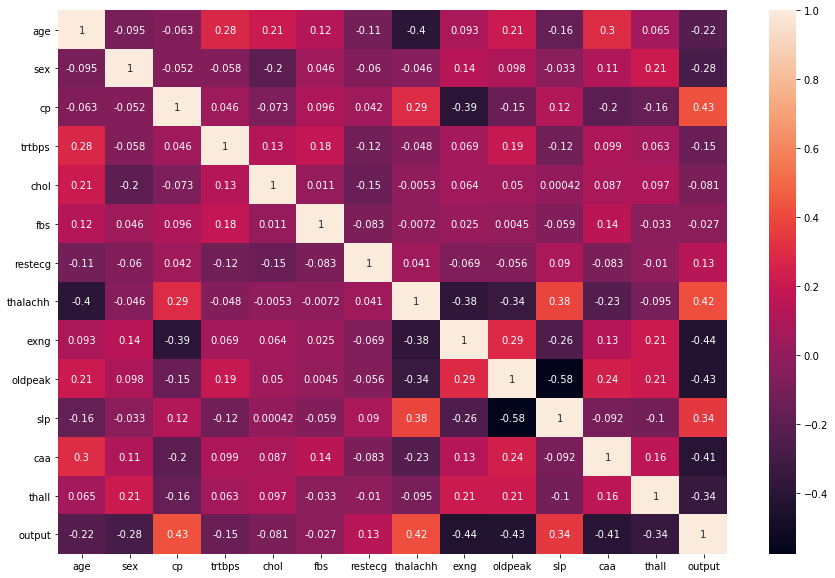

In [10]:
plt.figure(figsize=(15,10))
sns.heatmap(train.corr(),annot=True)

Text(0.5, 1.0, 'Chances of Heart Attack gender wise')

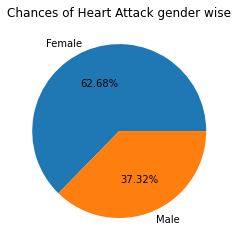

In [11]:
sex_hrt = train.groupby('sex')['output'].mean()
plt.pie(sex_hrt,labels=['Female','Male'],autopct = '%1.2f%%')
plt.title('Chances of Heart Attack gender wise')

Text(0.5, 1.0, 'Gender Vs Heart Attack count')

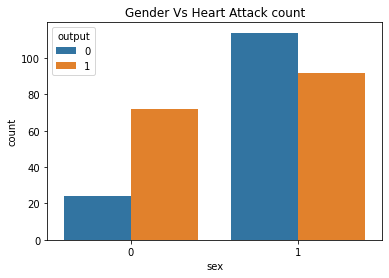

In [12]:
sns.countplot(x='sex',data=train,hue='output')
plt.title('Gender Vs Heart Attack count')

Text(0.5, 1.0, 'Distribution of age count with respect to Gender')

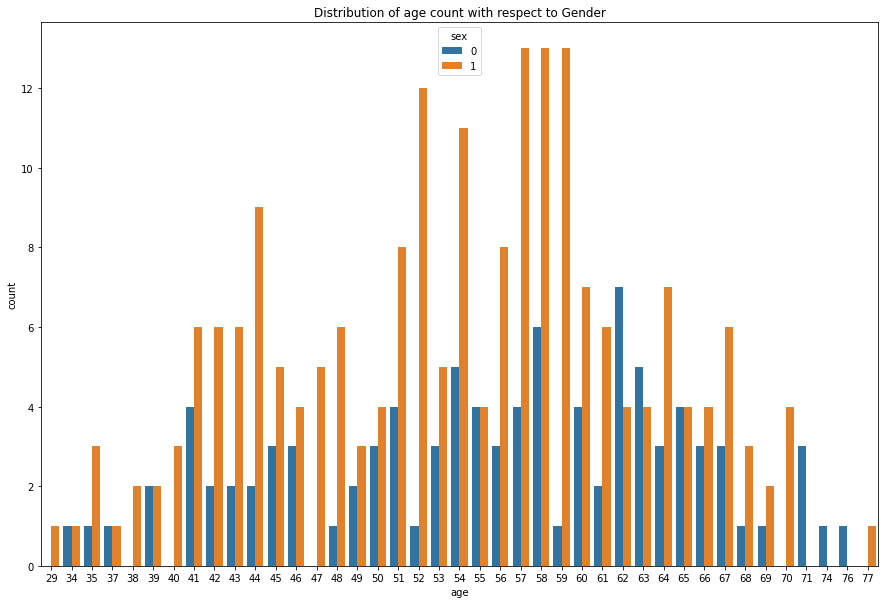

In [13]:
plt.figure(figsize=(15,10))
sns.countplot(x='age',data=train,hue='sex')
plt.title('Distribution of age count with respect to Gender')

Text(0.5, 1.0, 'Chest Pain distribution with respect to Heart Attack')

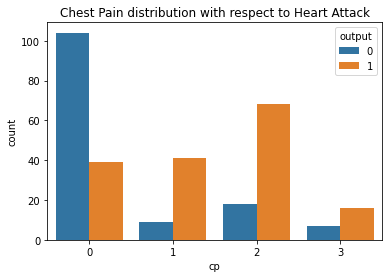

In [14]:
sns.countplot(x='cp',hue='output',data=train)
plt.title('Chest Pain distribution with respect to Heart Attack')

<AxesSubplot:xlabel='trtbps', ylabel='count'>

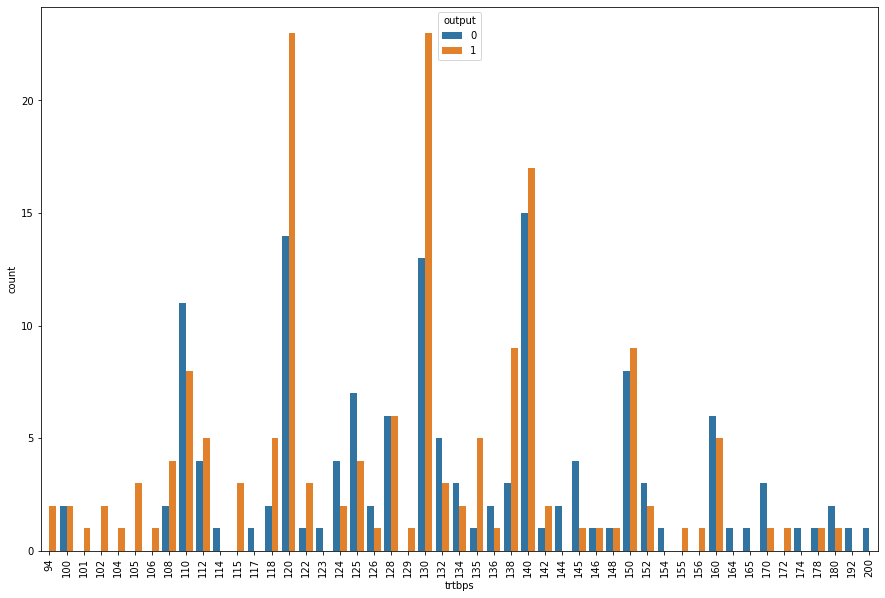

In [15]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.countplot(x='trtbps',hue='output',data=train)


Text(0.5, 1.0, 'Cholestrol variation w.r.t heart attack')

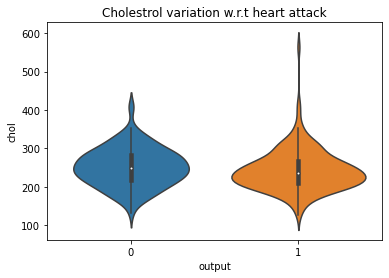

In [16]:
sns.violinplot(x='output',y='chol',data=train)
plt.title('Cholestrol variation w.r.t heart attack')

Text(0.5, 1.0, 'Fasting blood pressure varition over heart attack chances')

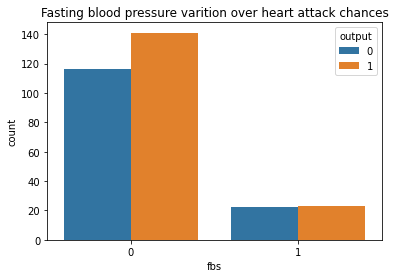

In [17]:
sns.countplot(x='fbs',hue='output',data=train)
plt.title('Fasting blood pressure varition over heart attack chances')

Text(0.5, 1.0, 'Resting electrocardiographic results over heart attack chances')

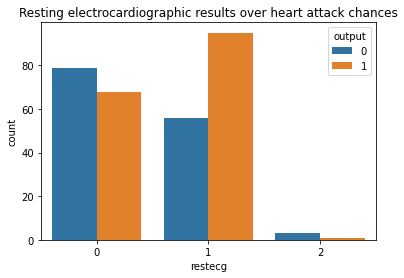

In [18]:
sns.countplot(x='restecg',hue='output',data=train)
plt.title('Resting electrocardiographic results over heart attack chances')

Text(0.5, 1.0, 'maximum heart rate achieved vs heart attack ')

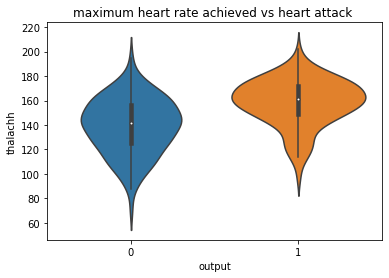

In [19]:
sns.violinplot(y='thalachh',x='output',data=train)
plt.title('maximum heart rate achieved vs heart attack ')

Text(0.5, 1.0, 'Heart Attack variation in Blood pressure Vs Age')

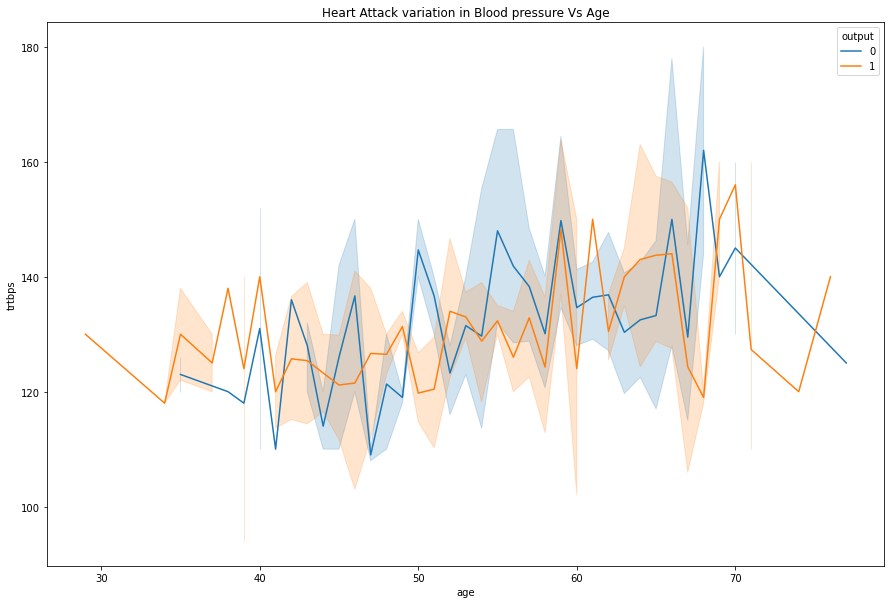

In [20]:
plt.figure(figsize=(15,10))
sns.lineplot(x='age',y='trtbps',hue='output',data=train)
plt.title('Heart Attack variation in Blood pressure Vs Age')

Text(0.5, 1.0, 'Heart Attack variation in Cholestrol Vs Age')

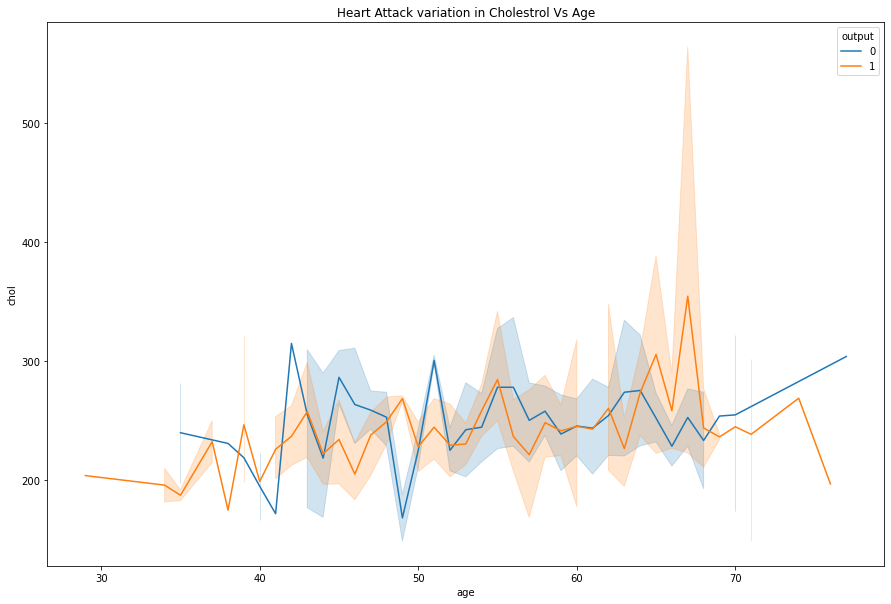

In [21]:
plt.figure(figsize=(15,10))
sns.lineplot(x='age',y='chol',hue='output',data=train)
plt.title('Heart Attack variation in Cholestrol Vs Age')

#### Data preprocessing

In [22]:
X=train.iloc[:,:-1].values
Y=train.iloc[:,-1].values
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)

In [23]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

#### Creating and Training models 

We are creating 4 models based on Logistic Regression , GaussianNB, Support Vector Machine and KNeighbor Classifier Alogrithms

In [24]:
#Logistic Regression

Classifier1=LogisticRegression()
Classifier1.fit(x_train,y_train)
y_pred1=Classifier1.predict(x_test)
print("Logistic Regression Classification report\n\n",classification_report(y_test,y_pred1))

Logistic Regression Classification report

               precision    recall  f1-score   support

           0       0.89      0.73      0.80        45
           1       0.78      0.91      0.84        46

    accuracy                           0.82        91
   macro avg       0.83      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91



In [25]:
#GaussianNB

Classifier2=GaussianNB()
Classifier2.fit(x_train,y_train)
y_pred2=Classifier2.predict(x_test)
print("GaussianNB Classification report\n\n",classification_report(y_test,y_pred2))

GaussianNB Classification report

               precision    recall  f1-score   support

           0       0.90      0.80      0.85        45
           1       0.82      0.91      0.87        46

    accuracy                           0.86        91
   macro avg       0.86      0.86      0.86        91
weighted avg       0.86      0.86      0.86        91



In [26]:
#Support vector machine

Classifier3=SVC()
Classifier3.fit(x_train,y_train)
y_pred3=Classifier3.predict(x_test)
print("Support vector machine Classification report\n\n",classification_report(y_test,y_pred3))

Support vector machine Classification report

               precision    recall  f1-score   support

           0       0.85      0.73      0.79        45
           1       0.77      0.87      0.82        46

    accuracy                           0.80        91
   macro avg       0.81      0.80      0.80        91
weighted avg       0.81      0.80      0.80        91



In [27]:
#KneighborsClassifier

Classifier4=KNeighborsClassifier()
Classifier4.fit(x_train,y_train)
y_pred4=Classifier4.predict(x_test)
print("KNeighborsClassifier Classification report\n\n",classification_report(y_test,y_pred4))

KNeighborsClassifier Classification report

               precision    recall  f1-score   support

           0       0.86      0.82      0.84        45
           1       0.83      0.87      0.85        46

    accuracy                           0.85        91
   macro avg       0.85      0.85      0.85        91
weighted avg       0.85      0.85      0.85        91



Got good accuracies in all models

#### Models comparison

In [28]:
models=[]
results=[y_pred1,y_pred2,y_pred3,y_pred4]
for i in range(4):
    models.append([precision_score(y_test,results[i]),
                   accuracy_score(y_test,results[i]),
                   recall_score(y_test,results[i]),
                   f1_score(y_test,results[i])])

In [29]:
pd.DataFrame(models,index=['Logistic Regression','GaussianNB','Support vector classifier','KNeighbors classifier'],
                    columns=['Precision','Accuracy','Recall','f1 score'])

,Precision,Accuracy,Recall,f1 score
Logistic Regression,0.777778,0.824176,0.913043,0.840000
GaussianNB,0.823529,0.857143,0.913043,0.865979
Support vector classifier,0.769231,0.802198,0.869565,0.816327
KNeighbors classifier,0.833333,0.846154,0.869565,0.851064
